In [20]:
import pandas as pd
file_path = r"D:\Intellipaat\Deep Learning\Assignment\Customer-Churn\Customer Churn\AI-Project\AI Project\customer-churn-data dictionary.xlsx"
excel_data = pd.ExcelFile(file_path)
excel_data.sheet_names

['Sheet1']

In [21]:
# Load the data from the first sheet
data = excel_data.parse('Sheet1')

# Display the first few rows of the data to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Column Name            21 non-null     object
 1   Description of Column  21 non-null     object
 2   Column Type            21 non-null     object
dtypes: object(3)
memory usage: 636.0+ bytes


(     Column Name                              Description of Column  \
 0     customerID                              Tells the customer ID   
 1         gender         Whether the customer is a male or a female   
 2  SeniorCitizen  Whether the customer is a senior citizen or no...   
 3        Partner  Whether the customer has a partner or not (Yes...   
 4     Dependents  Whether the customer has dependents or not (Ye...   
 
   Column Type  
 0      object  
 1      object  
 2       int64  
 3      Object  
 4      object  ,
 None)

In [22]:
import numpy as np

# Simulate a dataset with ~500 rows based on the dictionary structure
np.random.seed(42)  # For reproducibility
n_rows = 500

# Simulated columns based on the data dictionary
data_simulated = pd.DataFrame({
    'customerID': [f'CUST{i}' for i in range(1, n_rows + 1)],
    'gender': np.random.choice(['Male', 'Female'], n_rows),
    'SeniorCitizen': np.random.choice([0, 1], n_rows, p=[0.85, 0.15]),
    'Partner': np.random.choice(['Yes', 'No'], n_rows),
    'Dependents': np.random.choice(['Yes', 'No'], n_rows),
    'tenure': np.random.randint(0, 73, n_rows),
    'PhoneService': np.random.choice(['Yes', 'No'], n_rows, p=[0.9, 0.1]),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], n_rows, p=[0.5, 0.4, 0.1]),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_rows, p=[0.4, 0.4, 0.2]),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], n_rows, p=[0.3, 0.5, 0.2]),
    'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], n_rows, p=[0.3, 0.5, 0.2]),
    'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], n_rows, p=[0.3, 0.5, 0.2]),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], n_rows, p=[0.3, 0.5, 0.2]),
    'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], n_rows, p=[0.4, 0.4, 0.2]),
    'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], n_rows, p=[0.4, 0.4, 0.2]),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_rows, p=[0.6, 0.2, 0.2]),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], n_rows),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], n_rows),
    'MonthlyCharges': np.round(np.random.uniform(20.0, 120.0, n_rows), 2),
    'TotalCharges': np.round(np.random.uniform(20.0, 9000.0, n_rows), 2),
    'Churn': np.random.choice(['Yes', 'No'], n_rows, p=[0.27, 0.73])  # Assume 27% churn rate
})

# Display the first few rows of the simulated dataset
data_simulated.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST1,Male,0,Yes,Yes,45,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,43.36,8439.20,Yes
1,CUST2,Female,0,No,No,14,No,Yes,No,Yes,...,No,Yes,No internet service,No,Month-to-month,Yes,Mailed check,60.96,4778.28,Yes
2,CUST3,Male,1,No,No,24,Yes,Yes,DSL,No,...,No,No internet service,Yes,No internet service,Month-to-month,Yes,Electronic check,98.01,5541.83,Yes
3,CUST4,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,...,No,Yes,No internet service,Yes,Two year,Yes,Bank transfer (automatic),97.12,4352.16,No
4,CUST5,Male,0,Yes,No,16,Yes,No,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),42.81,861.04,No


###  Task A: Data Manipulation

In [23]:
# a. Total number of male customers
total_male_customers = data_simulated[data_simulated['gender'] == 'Male'].shape[0]
total_male_customers

244

In [24]:
# b. Total number of customers whose Internet Service is 'DSL'
total_dsl_customers = data_simulated[data_simulated['InternetService'] == 'DSL'].shape[0]
total_dsl_customers

202

In [25]:
# c. Extract Female senior citizens whose Payment Method is 'Mailed check'
new_customer_female_senior = data_simulated[
    (data_simulated['gender'] == 'Female') &
    (data_simulated['SeniorCitizen'] == 1) &
    (data_simulated['PaymentMethod'] == 'Mailed check')
]
new_customer_female_senior

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
23,CUST24,Female,1,Yes,Yes,40,Yes,Yes,DSL,No internet service,...,No internet service,No,No,Yes,One year,No,Mailed check,31.26,3210.50,No
101,CUST102,Female,1,Yes,Yes,60,No,Yes,No,Yes,...,No,Yes,No,No,Month-to-month,No,Mailed check,25.36,296.81,No
108,CUST109,Female,1,No,Yes,23,Yes,Yes,No,No internet service,...,No,No,Yes,No internet service,Two year,No,Mailed check,114.84,239.03,Yes
117,CUST118,Female,1,Yes,No,38,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No internet service,Month-to-month,No,Mailed check,68.75,1497.44,No
162,CUST163,Female,1,No,Yes,7,Yes,Yes,No,No,...,No internet service,No,Yes,Yes,One year,Yes,Mailed check,89.39,623.82,Yes
235,CUST236,Female,1,No,No,61,Yes,No phone service,Fiber optic,No,...,No,No internet service,Yes,Yes,Month-to-month,Yes,Mailed check,74.34,2218.30,Yes
258,CUST259,Female,1,Yes,No,70,Yes,No,No,No internet service,...,No internet service,No,Yes,Yes,Month-to-month,Yes,Mailed check,47.96,3246.86,No
434,CUST435,Female,1,Yes,No,46,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,Month-to-month,No,Mailed check,44.53,3685.97,Yes


In [26]:
# d. Extract customers with tenure < 10 months or Total Charges < $500
new_customer_tenure_charges = data_simulated[
    (data_simulated['tenure'] < 10) | (data_simulated['TotalCharges'] < 500)
]
new_customer_tenure_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5,CUST6,Female,0,Yes,Yes,8,Yes,No phone service,DSL,No,...,No,No,No internet service,No,Two year,Yes,Mailed check,112.22,6917.44,Yes
10,CUST11,Male,0,Yes,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,One year,No,Electronic check,75.99,669.77,No
24,CUST25,Female,0,Yes,Yes,7,Yes,No,Fiber optic,No,...,Yes,No,No internet service,No internet service,Month-to-month,Yes,Electronic check,113.40,461.46,No
25,CUST26,Female,0,Yes,No,10,Yes,No phone service,No,No internet service,...,No,No,Yes,Yes,Two year,No,Credit card (automatic),38.36,298.89,Yes
30,CUST31,Male,1,No,Yes,31,Yes,No,Fiber optic,Yes,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,65.63,320.17,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,CUST475,Male,0,No,No,5,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,95.24,7159.75,No
486,CUST487,Male,0,No,No,29,Yes,Yes,No,No internet service,...,Yes,Yes,No,No,Month-to-month,No,Bank transfer (automatic),84.28,489.37,No
488,CUST489,Male,0,Yes,No,5,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,No,Bank transfer (automatic),107.10,3937.21,Yes
490,CUST491,Female,0,No,Yes,6,Yes,No,Fiber optic,Yes,...,No,No,No internet service,Yes,Month-to-month,Yes,Mailed check,96.98,7347.98,No


In [27]:
# Display results
total_male_customers, total_dsl_customers, new_customer_female_senior.shape[0], new_customer_tenure_charges.shape[0]


(244, 202, 8, 100)

### Task B: Data Visualization:

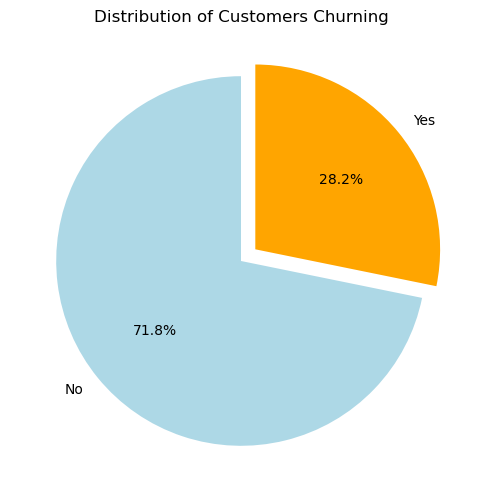

In [28]:
import matplotlib.pyplot as plt

# a. Pie chart to show the distribution of customers churning
churn_counts = data_simulated['Churn'].value_counts()
plt.figure(figsize=(8, 6))
churn_counts.plot.pie(
    autopct='%1.1f%%', 
    colors=['lightblue', 'orange'], 
    labels=['No', 'Yes'], 
    explode=(0, 0.1), 
    startangle=90
)
plt.title("Distribution of Customers Churning")
plt.ylabel("")  # Hides the 'Churn' label from the y-axis
plt.show()

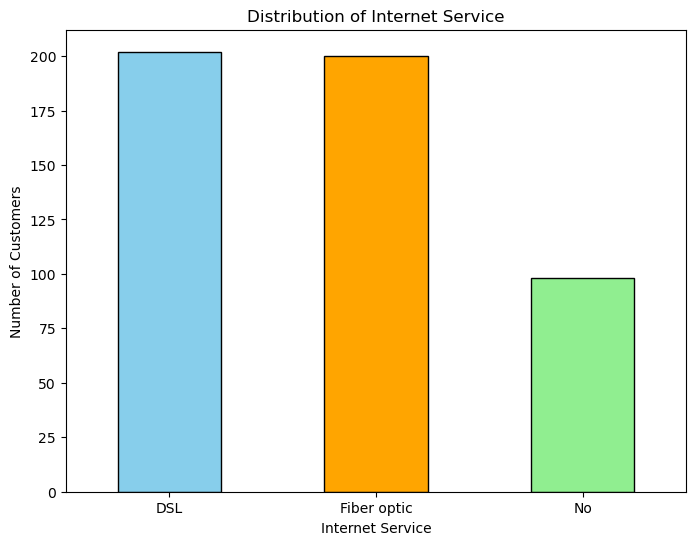

In [29]:
# b. Bar plot to show the distribution of 'Internet Service'
internet_service_counts = data_simulated['InternetService'].value_counts()
plt.figure(figsize=(8, 6))
internet_service_counts.plot.bar(
    color=['skyblue', 'orange', 'lightgreen'], 
    edgecolor='black'
)
plt.title("Distribution of Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.show()

### Task C: Model Building

### a. Build a sequential model using Keras, to find out if the customerwouldchurn or not

Epoch 1/150


C:\Users\garik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5587 - loss: 0.6810 - val_accuracy: 0.5000 - val_loss: 0.6867
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5252 - loss: 0.6661 - val_accuracy: 0.5375 - val_loss: 0.6787
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5641 - loss: 0.6525 - val_accuracy: 0.5875 - val_loss: 0.6733
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6152 - loss: 0.6474 - val_accuracy: 0.6125 - val_loss: 0.6695
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6761 - loss: 0.6462 - val_accuracy: 0.6625 - val_loss: 0.6660
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7002 - loss: 0.6326 - val_accuracy: 0.6625 - val_loss: 0.6629
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7046 - loss: 0.6139 - val_accuracy: 0.6625 - val_loss: 0.6611
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7363 - loss: 0.5986 - val_accuracy: 0.6625 - val_loss: 0.

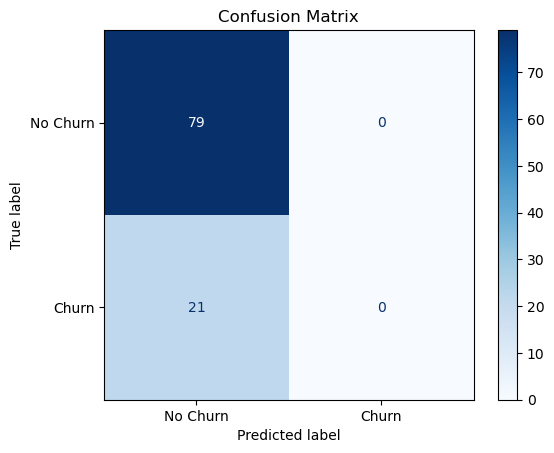

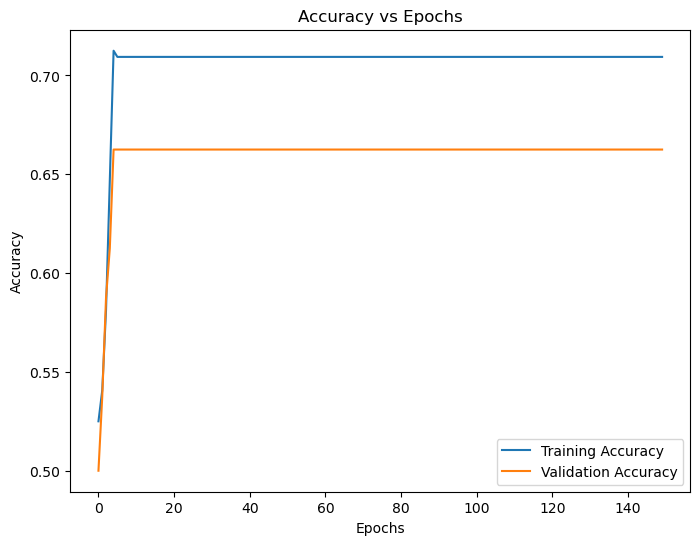

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Encode the target variable
data_simulated['Churn'] = LabelEncoder().fit_transform(data_simulated['Churn'])

# Prepare input and target variables
X = data_simulated[['tenure']].values  # Feature
y = data_simulated['Churn'].values    # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Sequential model
model = Sequential([
    Dense(12, input_dim=1, activation='relu'),  # Input layer
    Dense(8, activation='relu'),                # Hidden layer
    Dense(1, activation='sigmoid')              # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### b. Build the 2nd model using same target and feature variables:

Epoch 1/150


C:\Users\garik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6537 - loss: 0.6610 - val_accuracy: 0.6625 - val_loss: 0.6737
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6787 - loss: 0.6564 - val_accuracy: 0.6625 - val_loss: 0.6696
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6597 - loss: 0.6616 - val_accuracy: 0.6625 - val_loss: 0.6662
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6898 - loss: 0.6432 - val_accuracy: 0.6625 - val_loss: 0.6640
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6872 - loss: 0.6447 - val_accuracy: 0.6625 - val_loss: 0.6624
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7174 - loss: 0.6331 - val_accuracy: 0.6625 - val_loss: 0.6615
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7137 - loss: 0.6259 - val_accuracy: 0.6625 - val_loss: 0.6609
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7109 - loss: 0.6328 - val_accuracy: 0.6625 - val_loss: 0.

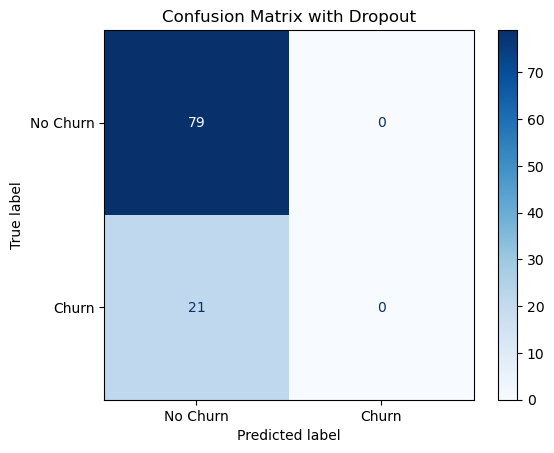

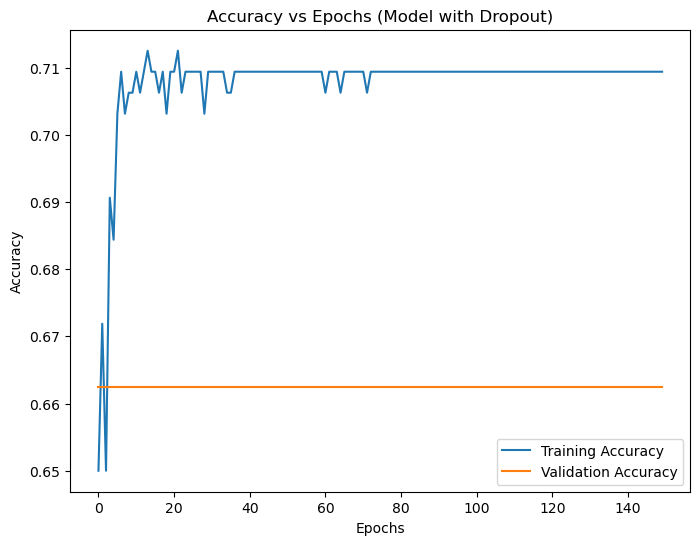

In [18]:
from tensorflow.keras.layers import Dropout

# Build the model with dropout layers
model_with_dropout = Sequential([
    Dense(12, input_dim=1, activation='relu'),  # Input layer
    Dropout(0.3),                               # Dropout after input layer
    Dense(8, activation='relu'),                # Hidden layer
    Dropout(0.2),                               # Dropout after hidden layer
    Dense(1, activation='sigmoid')              # Output layer
])

# Compile the model
model_with_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_with_dropout = model_with_dropout.fit(
    X_train, y_train, 
    epochs=150, batch_size=32, 
    validation_split=0.2, verbose=1
)

# Predict on the test set
y_pred_with_dropout = (model_with_dropout.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
cm_with_dropout = confusion_matrix(y_test, y_pred_with_dropout)
disp_with_dropout = ConfusionMatrixDisplay(confusion_matrix=cm_with_dropout, display_labels=['No Churn', 'Churn'])
disp_with_dropout.plot(cmap='Blues')
plt.title("Confusion Matrix with Dropout")
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(history_with_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs (Model with Dropout)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and 
‘Churn’ as the dependent/target column:

Epoch 1/150


C:\Users\garik\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6849 - loss: 0.6517 - val_accuracy: 0.6625 - val_loss: 0.6482
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6964 - loss: 0.6395 - val_accuracy: 0.6625 - val_loss: 0.6453
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6840 - loss: 0.6384 - val_accuracy: 0.6625 - val_loss: 0.6437
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7168 - loss: 0.6119 - val_accuracy: 0.6625 - val_loss: 0.6432
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7160 - loss: 0.6151 - val_accuracy: 0.6625 - val_loss: 0.6433
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7169 - loss: 0.6157 - val_accuracy: 0.6625 - val_loss: 0.6440
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7258 - loss: 0.5989 - val_accuracy: 0.6625 - val_loss: 0.6449
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7112 - loss: 0.6042 - val_accuracy: 0.6625 - val_loss: 0.

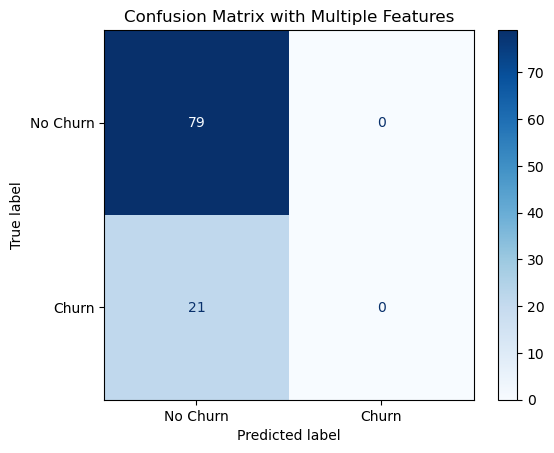

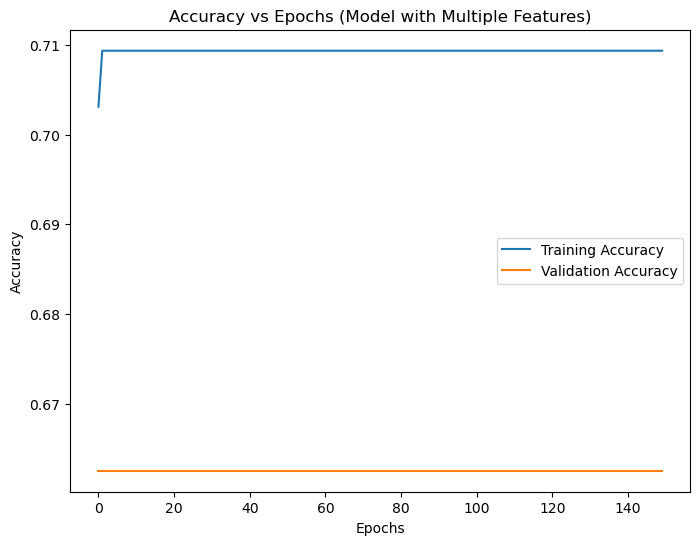

In [19]:
# Prepare input and target variables
X = data_simulated[['tenure', 'MonthlyCharges', 'TotalCharges']].values  # Features
y = data_simulated['Churn'].values  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Sequential model
model_with_multiple_features = Sequential([
    Dense(12, input_dim=3, activation='relu'),  # Input layer
    Dense(8, activation='relu'),                # Hidden layer
    Dense(1, activation='sigmoid')              # Output layer
])

# Compile the model
model_with_multiple_features.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_with_multiple_features = model_with_multiple_features.fit(
    X_train, y_train, 
    epochs=150, batch_size=32, 
    validation_split=0.2, verbose=1
)

# Predict on the test set
y_pred_multiple_features = (model_with_multiple_features.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
cm_multiple_features = confusion_matrix(y_test, y_pred_multiple_features)
disp_multiple_features = ConfusionMatrixDisplay(confusion_matrix=cm_multiple_features, display_labels=['No Churn', 'Churn'])
disp_multiple_features.plot(cmap='Blues')
plt.title("Confusion Matrix with Multiple Features")
plt.show()

# Plot Accuracy vs Epochs
plt.figure(figsize=(8, 6))
plt.plot(history_with_multiple_features.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_multiple_features.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy vs Epochs (Model with Multiple Features)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
